<a href="https://colab.research.google.com/github/jordantangy/MoviePosterClassification-CNN/blob/main/ConvNet%20Movie%20Poster%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 50kB/s 
     |████████████████████████████████| 4.3MB 59.3MB/s 
     |████████████████████████████████| 501kB 60.4MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
#import data set
!git clone https://github.com/jordantangy/Movie-Posters-Dataset.git

Cloning into 'Movie-Posters-Dataset'...
remote: Enumerating objects: 66546, done.
remote: Total 66546 (delta 0), reused 0 (delta 0), pack-reused 66546
Receiving objects: 100% (66546/66546), 572.63 MiB | 59.22 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (7872/7872), done.


In [16]:
data = pd.read_csv('/content/Movie-Posters-Dataset/train.csv')
print(data.head())
data['Id'][1]

          Id                                Genre  ...  War  Western
0  tt0086425                  ['Comedy', 'Drama']  ...    0        0
1  tt0085549        ['Drama', 'Romance', 'Music']  ...    0        0
2  tt0086465                           ['Comedy']  ...    0        0
3  tt0086567               ['Sci-Fi', 'Thriller']  ...    0        0
4  tt0086034  ['Action', 'Adventure', 'Thriller']  ...    0        0

[5 rows x 27 columns]


'tt0085549'

In [20]:
pic_width = 350
pic_height = 350
X = []
for i in tqdm(range(int(data.shape[0]))):
  path = '/content/Movie-Posters-Dataset/Images/'+ data['Id'][i] +'.jpg'
  img = image.load_img(path, target_size=(pic_width,pic_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:24<00:00, 300.38it/s]


## Example of a picture from the DataSet and its classification 

"['Comedy', 'Drama', 'Romance']"

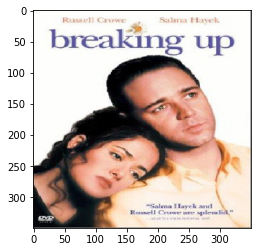

In [21]:
plt.imshow(X[2649])
data['Genre'][2649]

In [22]:
#matrix y comes from the csv file, we just drop the column id and genre.
#So we have a matrix representing which genre each movie belongs to

y = data.drop(['Id','Genre'], axis = 1)
y = y.to_numpy()


## Split to training set and test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

## Building CNN 

In [24]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(25, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

### **Training the ConvNet**

In [30]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/7
  32/6165 [..............................] - ETA: 3:45

KeyboardInterrupt: ignored

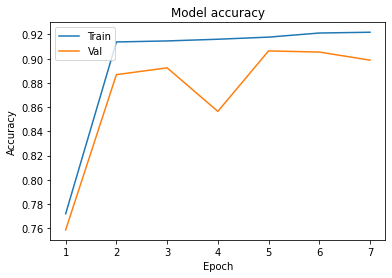

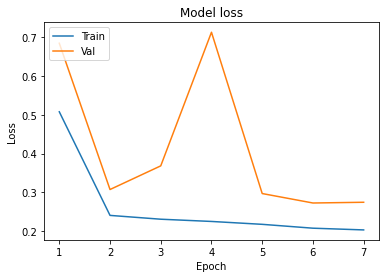

In [28]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 7)


The 3 genres predicted for the Movie Fauda are :
Action
Thriller
Drama


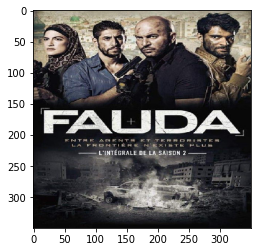

In [ ]:
img = image.load_img('/content/Movie-Posters-Dataset/Fauda.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[2:]
y_prob = model.predict(img)
arr = np.array(y_prob)
top3 = np.argsort(y_prob[0])

print('The 3 genres predicted for the Movie Fauda are :')
for i in range(22,25):
  print(genres[top3][i])

In [1]:
img = image.load_img('/content/716P1xCmnPL._AC_SY879_.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[2:]
y_prob = model.predict(img)
arr = np.array(y_prob)
top3 = np.argsort(y_prob[0])

print('The 3 genres predicted for the Movie Interstellar are :')
for i in range(22,25):
  print(genres[top3][i])

NameError: ignored